In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_score

In [3]:
df=pd.read_csv("C:\\Users\\singh\\Downloads\\household_power_consumption\\household_power_consumption.txt", sep=';')

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (2,3,4,5,6,7) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [4]:
df.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


In [5]:
df.isnull().sum()

Date                         0
Time                         0
Global_active_power          0
Global_reactive_power        0
Voltage                      0
Global_intensity             0
Sub_metering_1               0
Sub_metering_2               0
Sub_metering_3           25979
dtype: int64

In [6]:
df.replace('?',np.nan,inplace=True)

In [7]:
df_sample = df.sample(n=5000)

In [8]:
df_sample["Global_active_power"]=df["Global_active_power"].fillna(df["Global_active_power"].mode()[0])
df_sample["Global_reactive_power"]=df["Global_reactive_power"].fillna(df["Global_reactive_power"].mode()[0])
df_sample["Voltage"]=df["Voltage"].fillna(df["Voltage"].mode()[0])
df_sample["Global_intensity"]=df["Global_intensity"].fillna(df["Global_intensity"].mode()[0])
df_sample["Sub_metering_1"]=df["Sub_metering_1"].fillna(df["Sub_metering_1"].mode()[0])
df_sample["Sub_metering_2"]=df["Sub_metering_2"].fillna(df["Sub_metering_2"].mode()[0])
df_sample["Sub_metering_3"]=df["Sub_metering_3"].fillna(df["Sub_metering_3"].mode()[0])

In [9]:
df_sample.drop(['Date'],axis=1, inplace=True)

In [10]:
df_sample.drop(['Time'],axis=1,inplace=True)

In [11]:
df_sample = df_sample.astype(float)

Text(0.5, 1.0, 'Correlation Factors Heat Map')

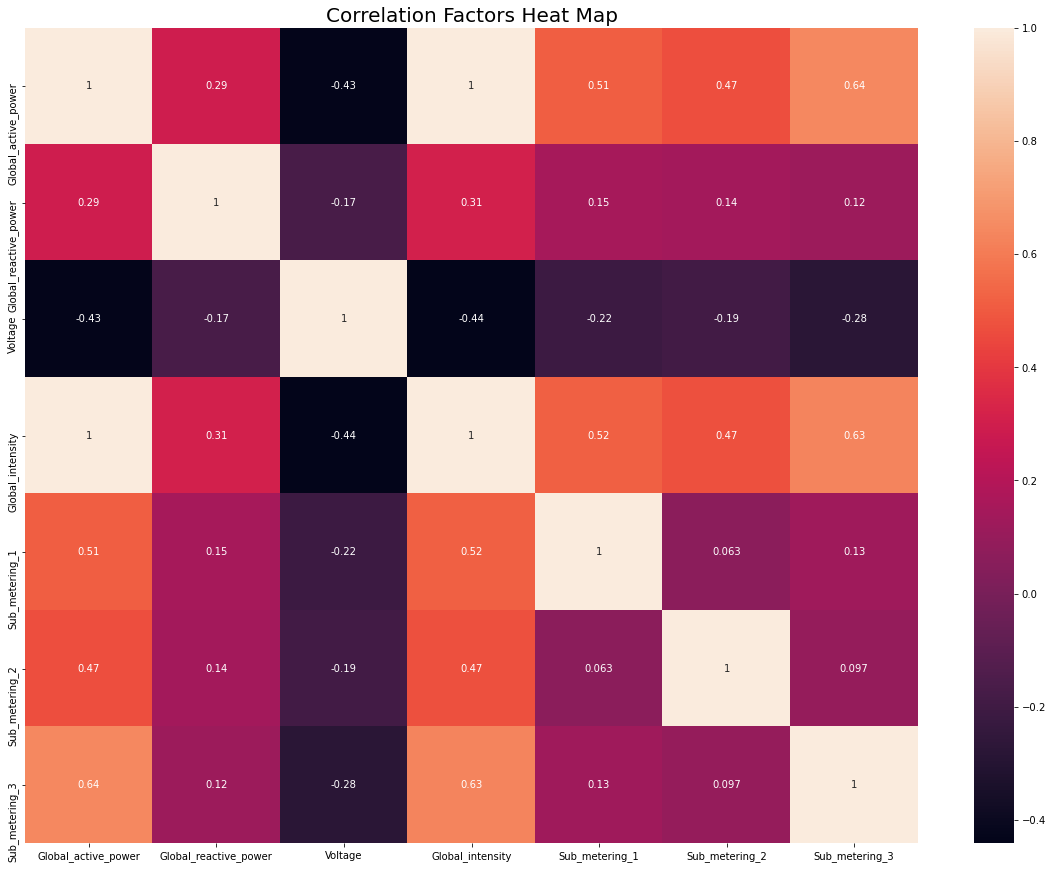

In [12]:
plt.figure(figsize=(20,15))
sns.heatmap(df_sample.corr(), annot=True).set_title('Correlation Factors Heat Map', color='black', size='20')

In [13]:
from sklearn.preprocessing import StandardScaler
sc_dfa = StandardScaler()
df_std = sc_dfa.fit_transform(df_sample)

In [ ]:
from sklearn.metrics import silhouette_score
silhouette_scores = [] 

for n_cluster in range(2,55):
    silhouette_scores.append( 
        silhouette_score(df_std, KMeans(n_clusters = n_cluster).fit_predict(df_std))) 
    
# Plotting a bar graph to compare the results 
k = [2, 3, 4, 5, 6,7,8,9,10,11,12,13,14] 
plt.bar(k, silhouette_scores) 
plt.xlabel('Number of clusters', fontsize = 10) 
plt.ylabel('Silhouette Score', fontsize = 10) 
plt.grid()
plt.show() 

In [ ]:
# K-Means Clustering
from sklearn.cluster import KMeans

nclusters = 4 # this is the k in kmeans
seed = 0

km = KMeans(n_clusters=nclusters, random_state=seed)
km.fit(df_sample)

# predict the cluster for each data point
y_cluster_kmeans = km.predict(df_sample)
y_cluster_kmeans

In [16]:
from sklearn import metrics
score = metrics.silhouette_score(df_sample, y_cluster_kmeans)
score

0.7186800225786003

Agglomerative

In [ ]:
from scipy.cluster.hierarchy import linkage,dendrogram
merg = linkage(df_sample, method = "ward")
dendrogram(merg, leaf_rotation = 90)
plt.xlabel("data points")
plt.ylabel("euclidean distance")
plt.show()